In [1]:
import os
import sys

import numpy as np
import pandas as pd

root = os.path.dirname(os.path.abspath("."))
sys.path.append(root)

import predikit as pk

import logging
logging.getLogger().setLevel(logging.WARNING)

In [2]:
init_params = {'port': 36494}
from predikit import initialize_cluster_server
initialize_cluster_server(init_params)

Checking whether there is an H2O instance running at http://localhost:36494..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19+36-2238, mixed mode, sharing)
  Starting server from D:\Projects\Graduation Project\PrediKit\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\mohanad\AppData\Local\Temp\tmpye8avfyy
  JVM stdout: C:\Users\mohanad\AppData\Local\Temp\tmpye8avfyy\h2o_mohanad_started_from_python.out
  JVM stderr: C:\Users\mohanad\AppData\Local\Temp\tmpye8avfyy\h2o_mohanad_started_from_python.err
  Server is running at http://127.0.0.1:36494
Connecting to H2O server at http://127.0.0.1:36494 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_mohanad_9y6s39
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.840 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [3]:
from predikit import AutoML, import_file, split_train_test

data = import_file('sample_data/heart.csv')
data['target'] = data['target'].asfactor()
aml = AutoML(max_runtime_secs=60, stopping_metric='AUTO', seed= 1)
aml.train(training_frame= data, y= 'target')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
22:24:13.957: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_lr_annealing_selection_AutoML_1_20240423_222413_select_model


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          7368                   2            4            3.78          4             9             7.08

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.08189868760482993
RMSE: 0.2861794674759703
LogLoss: 0.287998840204807
Mean Per-Class Error: 0.10698287220026349
AUC: 0.9695212999560825
AUCPR: 0.9753685323900857
Gini: 0.939042599912165

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48961278600736985
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      116  22   0.1594   (22.0/138.0)
1      9    156  0.0545   (9.0/165.0)
Total  125  178  0.1023   (31.0/303.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.489613     0.909621  176
max f2                       0.310472     0.94579   205
max f0point5                 0.667649     0.943135  137
max accuracy                 0.589914     0.90429   152
max precision                0.978206     1         0
max recall                   0.131904     1         244
max specificity              0.978206     1         0
max absolute_mcc             0.589914     0.810444  152
max min_per_class_accuracy   0.558532     0.89697   159
max mean_per_class_accuracy  0.589914     0.906785  152
max tns                      0.978206     138       0
max fns                      0.978206     164       0
max fps                      0.0222595    138       300
max tps                      0.131904     165       244
max tnr                      0.978206     1         0
max fnr                      0.978206     0.993939  0
max fpr                      0.0222595    1         300
max tpr                      0.131904     1         244

Gains/Lift Table: Avg response rate: 54.46 %, avg score: 54.45 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0132013                   0.967185           1.83636    1.83636            1                0.973587   1                           0.973587            0.0242424       0.0242424                  83.6364   83.6364            0.0242424
2        0.0231023                   0.96547            1.83636    1.83636            1                0.966146   1                           0.970398            0.0181818       0.0424242                  83.6364   83.6364            0.0424242
3        0.0330033                   0.963519           1.83636    1.83636            1                0.964096   1                           0.968507            0.0181818       0.0606061                  83.6364   83.6364            0.0606061
4        0.0429043                   0.959666           1.83636    1.83636            1                0.96169    1                           0.966934            0.0181818       0.0787879                  83.6364   83.6364            0.0787879
5        0.0528053                   0.957653           1.83636    1.83636            1                0.958358   1             

In [4]:
aml.confusion_matrix()

,0,1,Error,Rate
0,116.0,22.0,0.1594,(22.0/138.0)
1,9.0,156.0,0.0545,(9.0/165.0)
Total,125.0,178.0,0.1023,(31.0/303.0)


In [5]:
aml.model_performance(data)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0818986878722407
RMSE: 0.28617946794317844
LogLoss: 0.2879988413191078
Mean Per-Class Error: 0.10698287220026349
AUC: 0.9695212999560825
AUCPR: 0.9753685323900857
Gini: 0.939042599912165

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48961278599087743
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      116  22   0.1594   (22.0/138.0)
1      9    156  0.0545   (9.0/165.0)
Total  125  178  0.1023   (31.0/303.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.489613     0.909621  176
max f2                       0.310472     0.94579   205
max f0point5                 0.667649     0.943135  137
max accuracy                 0.589914     0.90429   152
max precision                0.978206     1         0
max recall                   0.131904     1         244
max specificity              0.978206     1         0
max absolute_mcc             0.589914     0.810444  152
max min_per_class_accuracy   0.558532     0.89697   159
max mean_per_class_accuracy  0.589914     0.906785  152
max tns                      0.978206     138       0
max fns                      0.978206     164       0
max fps                      0.0222595    138       300
max tps                      0.131904     165       244
max tnr                      0.978206     1         0
max fnr                      0.978206     0.993939  0
max fpr                      0.0222595    1         300
max tpr                      0.131904     1         244

Gains/Lift Table: Avg response rate: 54.46 %, avg score: 54.45 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0132013                   0.967185           1.83636    1.83636            1                0.973587   1                           0.973587            0.0242424       0.0242424                  83.6364   83.6364            0.0242424
2        0.0231023                   0.96547            1.83636    1.83636            1                0.966146   1                           0.970398            0.0181818       0.0424242                  83.6364   83.6364            0.0424242
3        0.0330033                   0.963519           1.83636    1.83636            1                0.964096   1                           0.968507            0.0181818       0.0606061                  83.6364   83.6364            0.0606061
4        0.0429043                   0.959666           1.83636    1.83636            1                0.96169    1                           0.966934            0.0181818       0.0787879                  83.6364   83.6364            0.0787879
5        0.0528053                   0.957653           1.83636    1.83636            1                0.958358   1                           0.965326            0.0181818       0.0969697                  83.6364   83.6364            0.0969697
6        0.10231                     0.943472           1.83636    1.83636            1                0.949192   1                           0.957519            0.0909091       0.187879                   83.6364   83.6364            0.187879
7        0.151815                    0.916923           1.83636    1.83636            1                0.930962   1                           0.948859            0.0909091       0.278788                   83.6364   83.6364            0.278788
8        0.20132                   

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20240423_222413_model_8,1,0.0435673,1,0,0.0463362,0.00214704,74,0.011662,GBM
GBM_grid_1_AutoML_1_20240423_222413_model_13,1,0.0724566,1,0,0.0975874,0.00952329,95,0.012854,GBM
GBM_grid_1_AutoML_1_20240423_222413_model_21,1,0.0362528,1,0,0.0423659,0.00179487,85,0.011793,GBM
GBM_grid_1_AutoML_1_20240423_222413_model_18,1,0.0611748,1,0,0.0784191,0.00614955,82,0.01317,GBM
GBM_5_AutoML_1_20240423_222413,1,0.0710821,1,0,0.0857029,0.00734498,50,0.008752,GBM
DRF_1_AutoML_1_20240423_222413,1,0.114775,1,0,0.142543,0.0203186,109,0.008781,DRF
GBM_grid_1_AutoML_1_20240423_222413_model_15,1,0.103562,1,0,0.122633,0.0150389,66,0.010304,GBM
DeepLearning_grid_1_AutoML_1_20240423_222413_model_1,0.999956,0.0313402,0.999963,0.00362319,0.0914337,0.00836012,3156,0.009855,DeepLearning
DeepLearning_grid_1_AutoML_1_20240423_222413_model_2,0.999956,0.0367916,0.999963,0.00362319,0.102406,0.010487,1609,0.009384,DeepLearning
GBM_grid_1_AutoML_1_20240423_222413_model_12,0.99978,0.127519,0.999816,0.00724638,0.144815,0.0209713,36,0.0082,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_lr_annealing_selection_AutoML_1_20240423_222413_select_model

,0,1,Error,Rate
0,116.0,22.0,0.1594,(22.0/138.0)
1,9.0,156.0,0.0545,(9.0/165.0)
Total,125.0,178.0,0.1023,(31.0/303.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

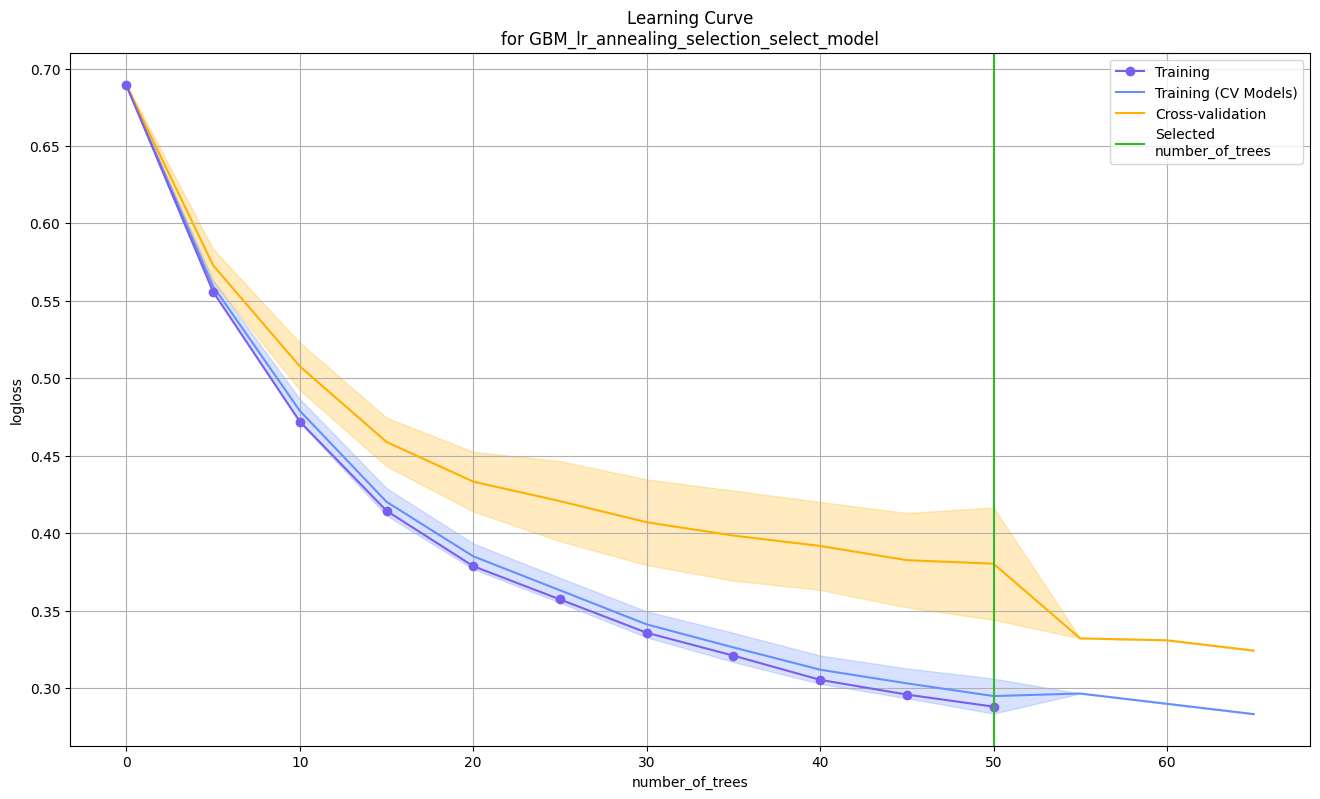

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

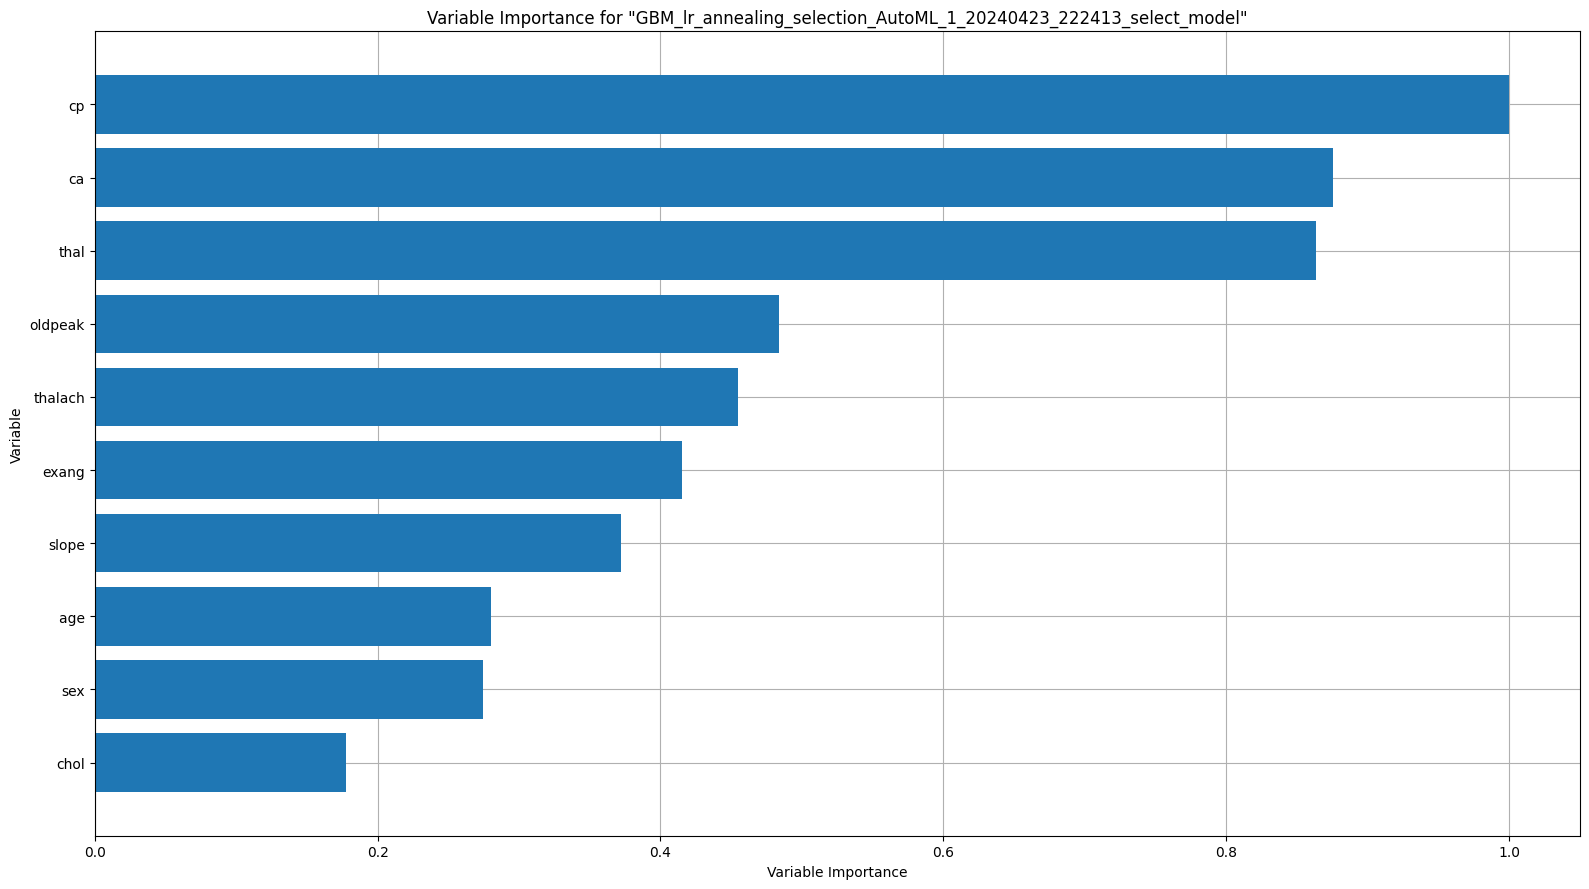

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

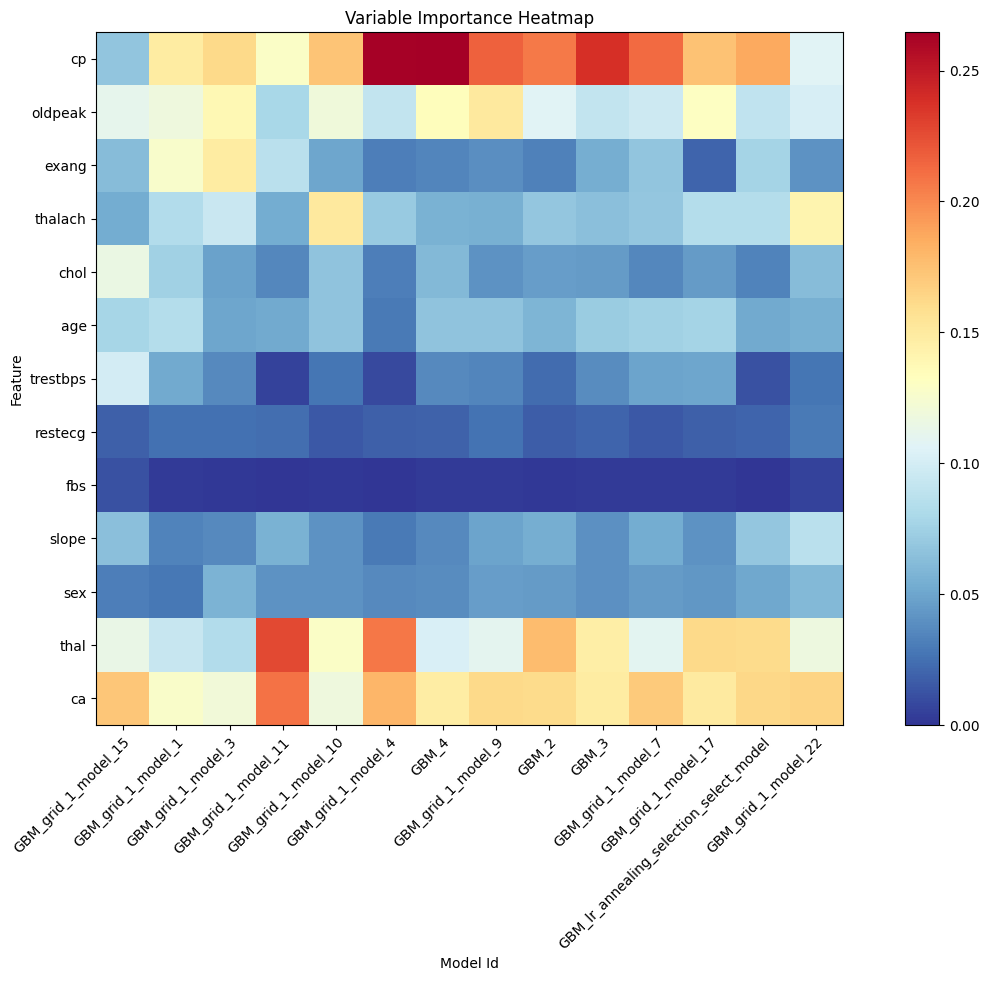

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

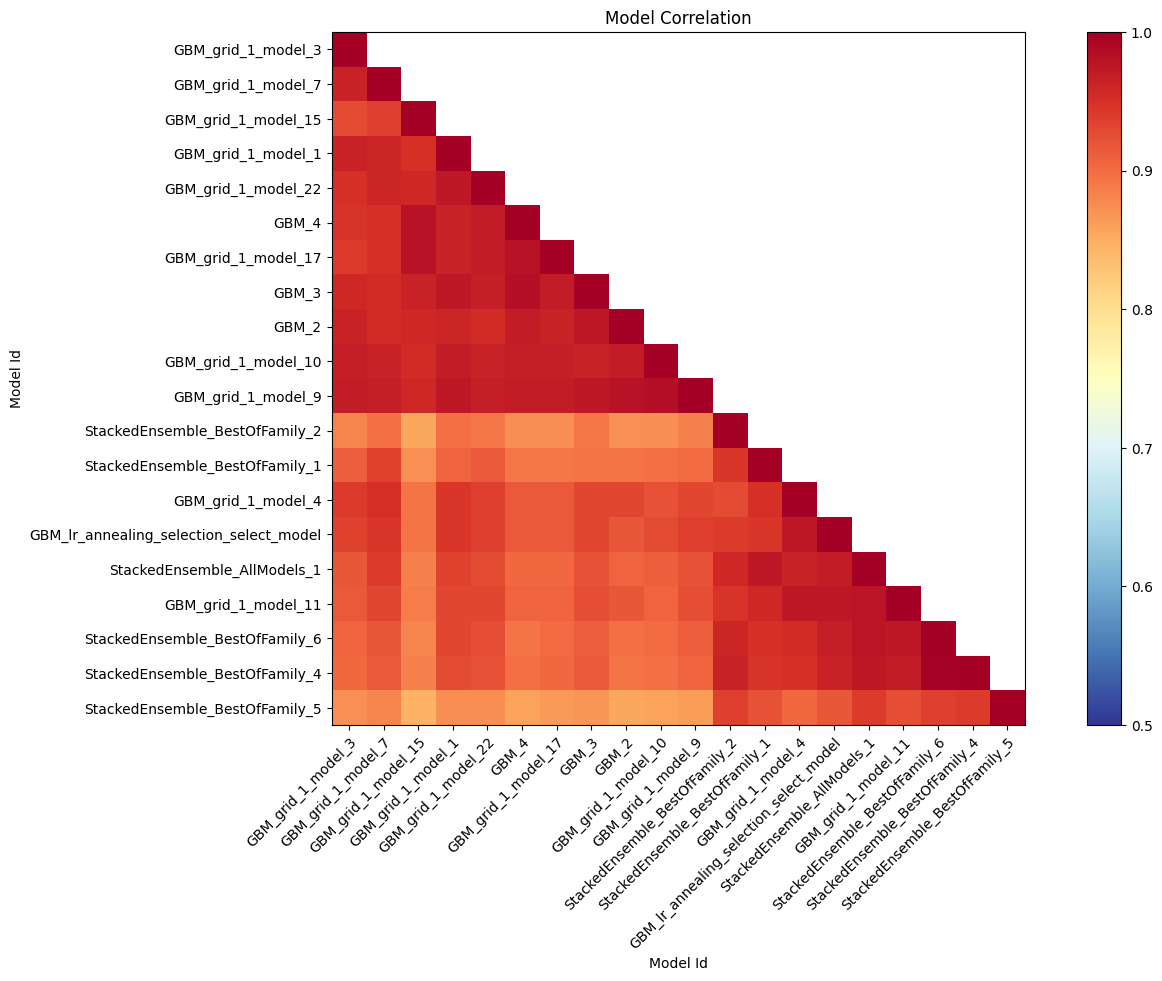

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

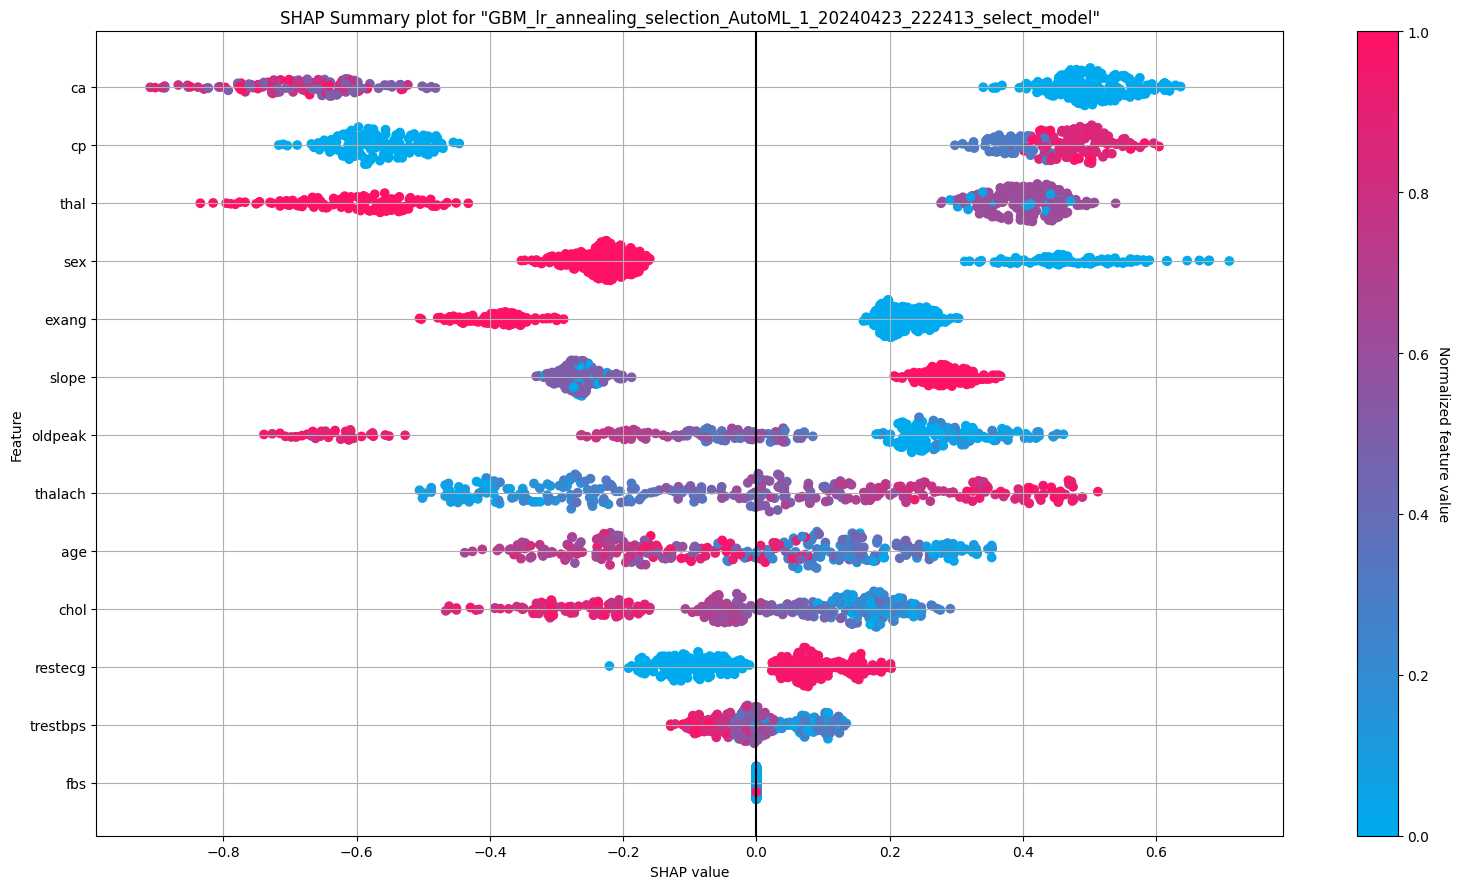

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

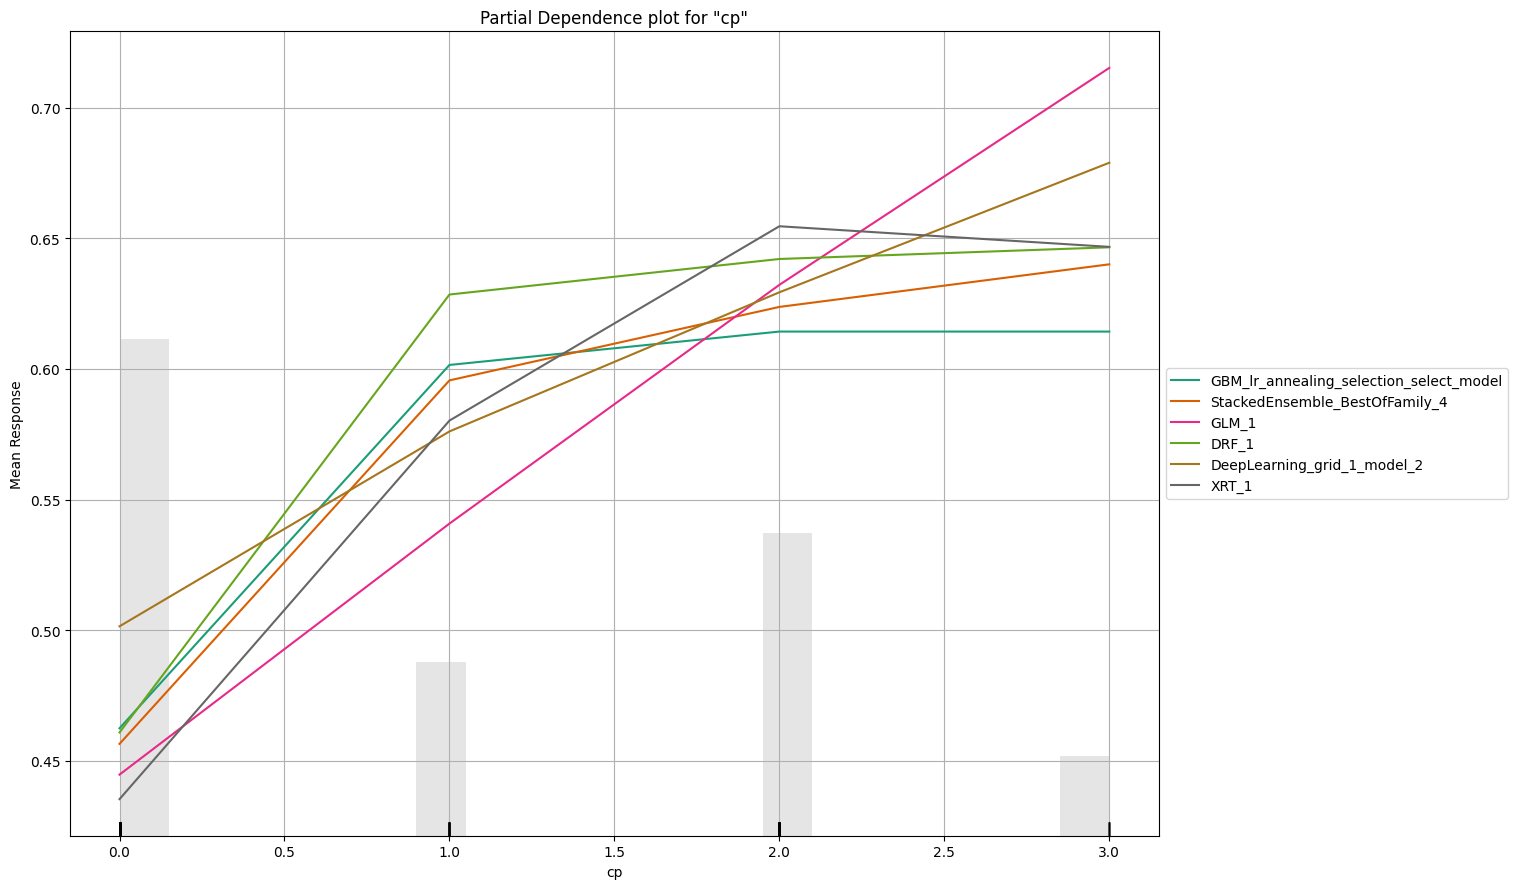

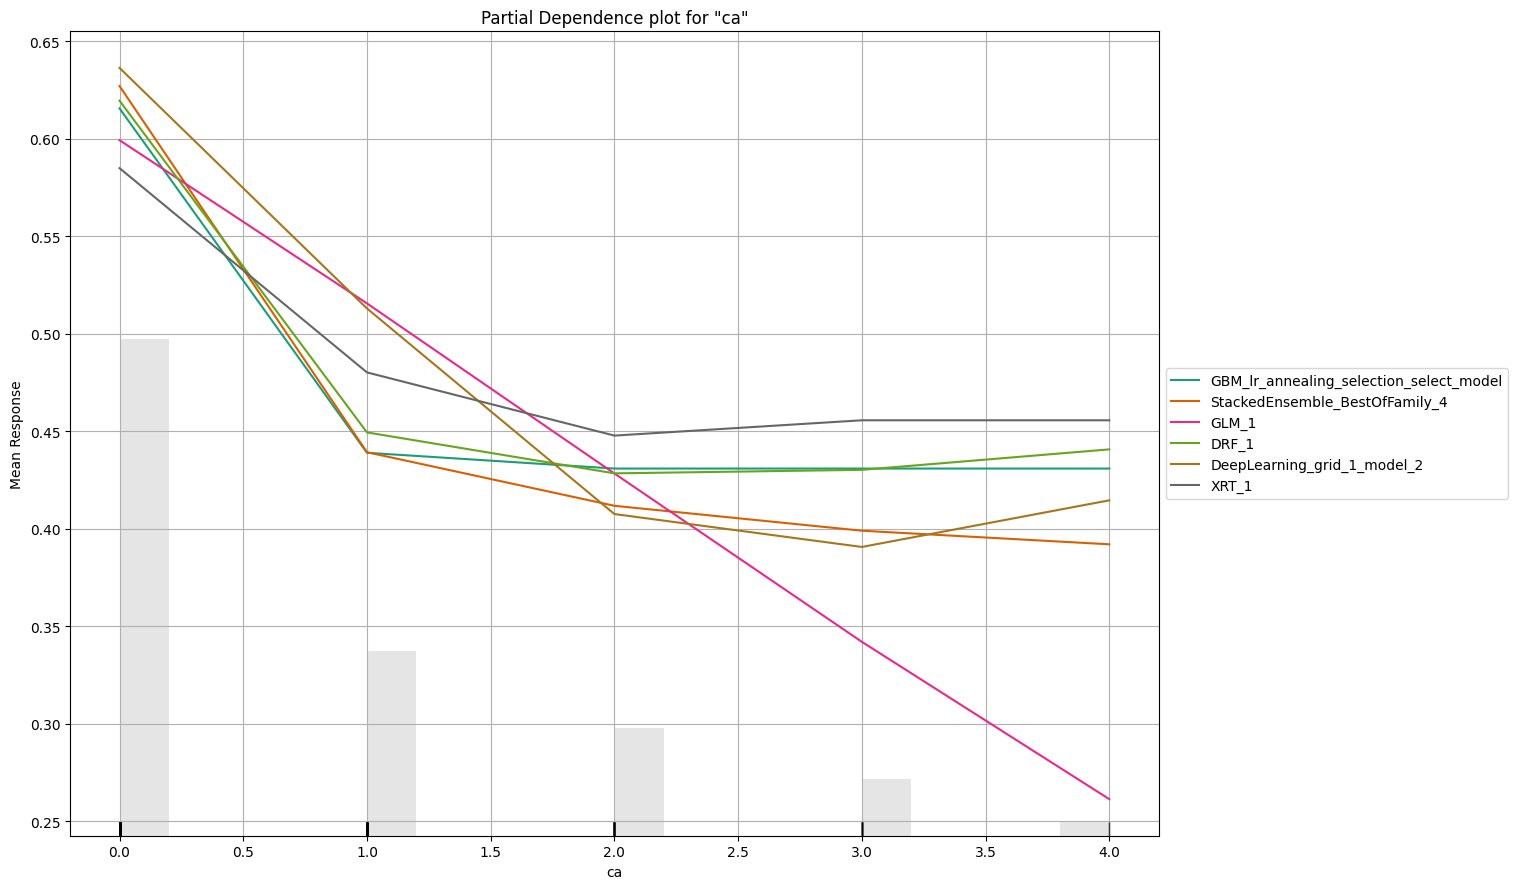

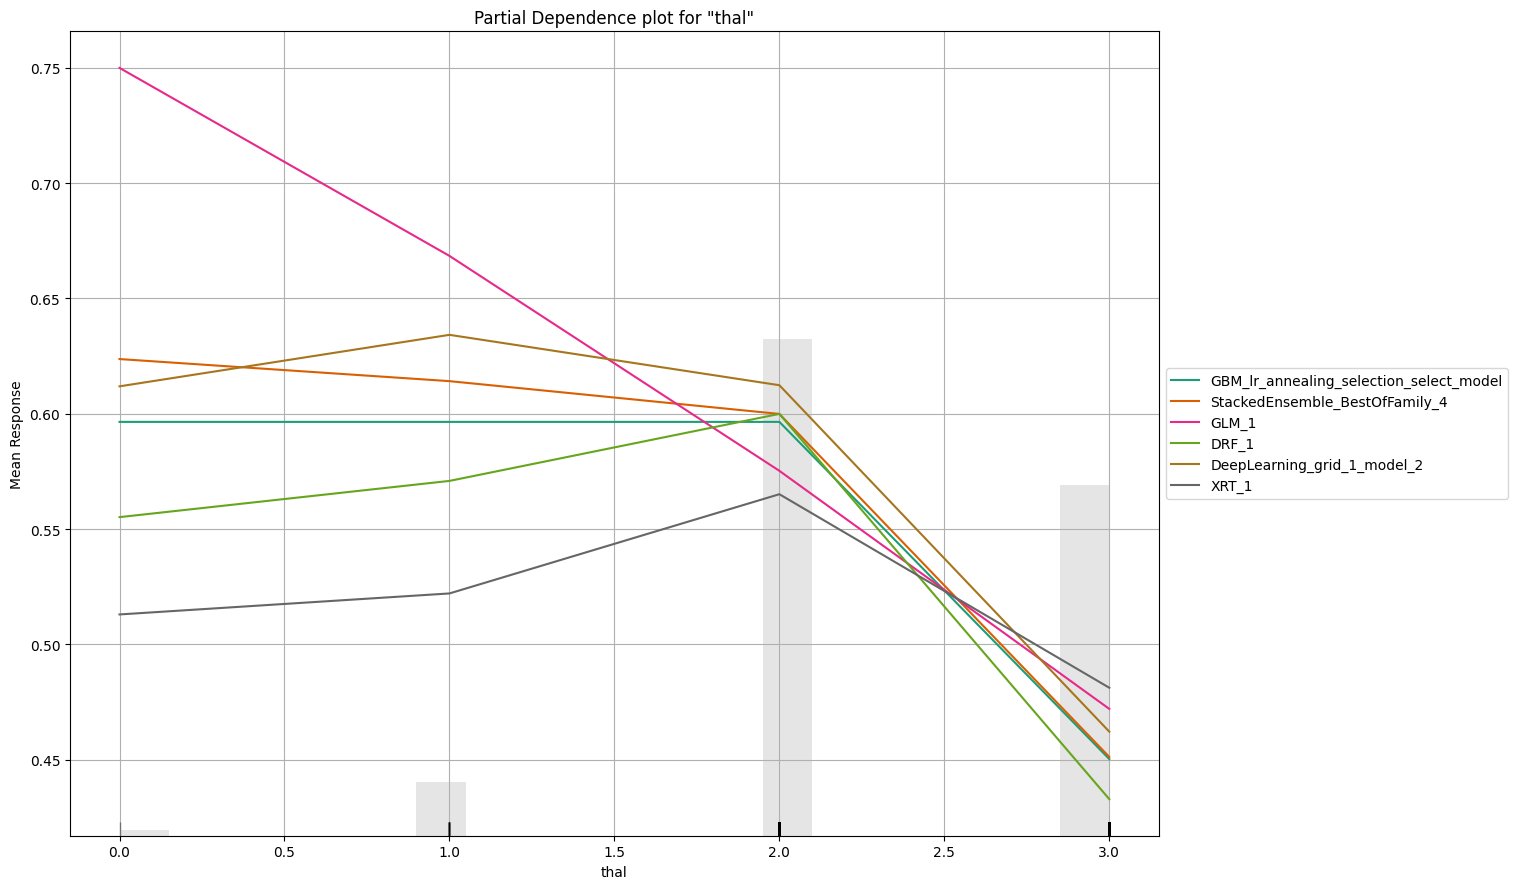

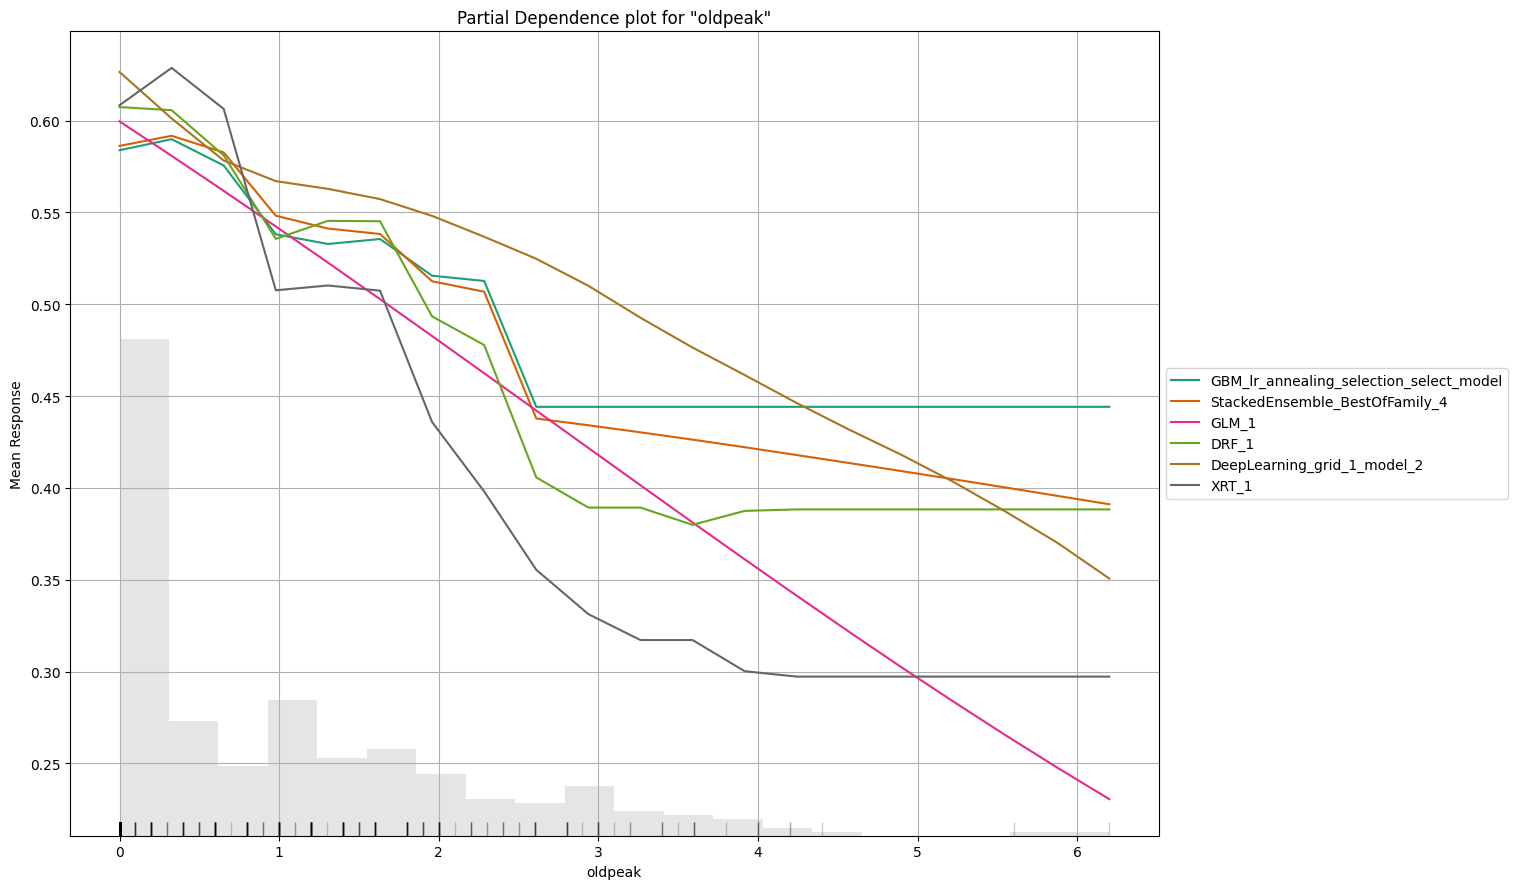

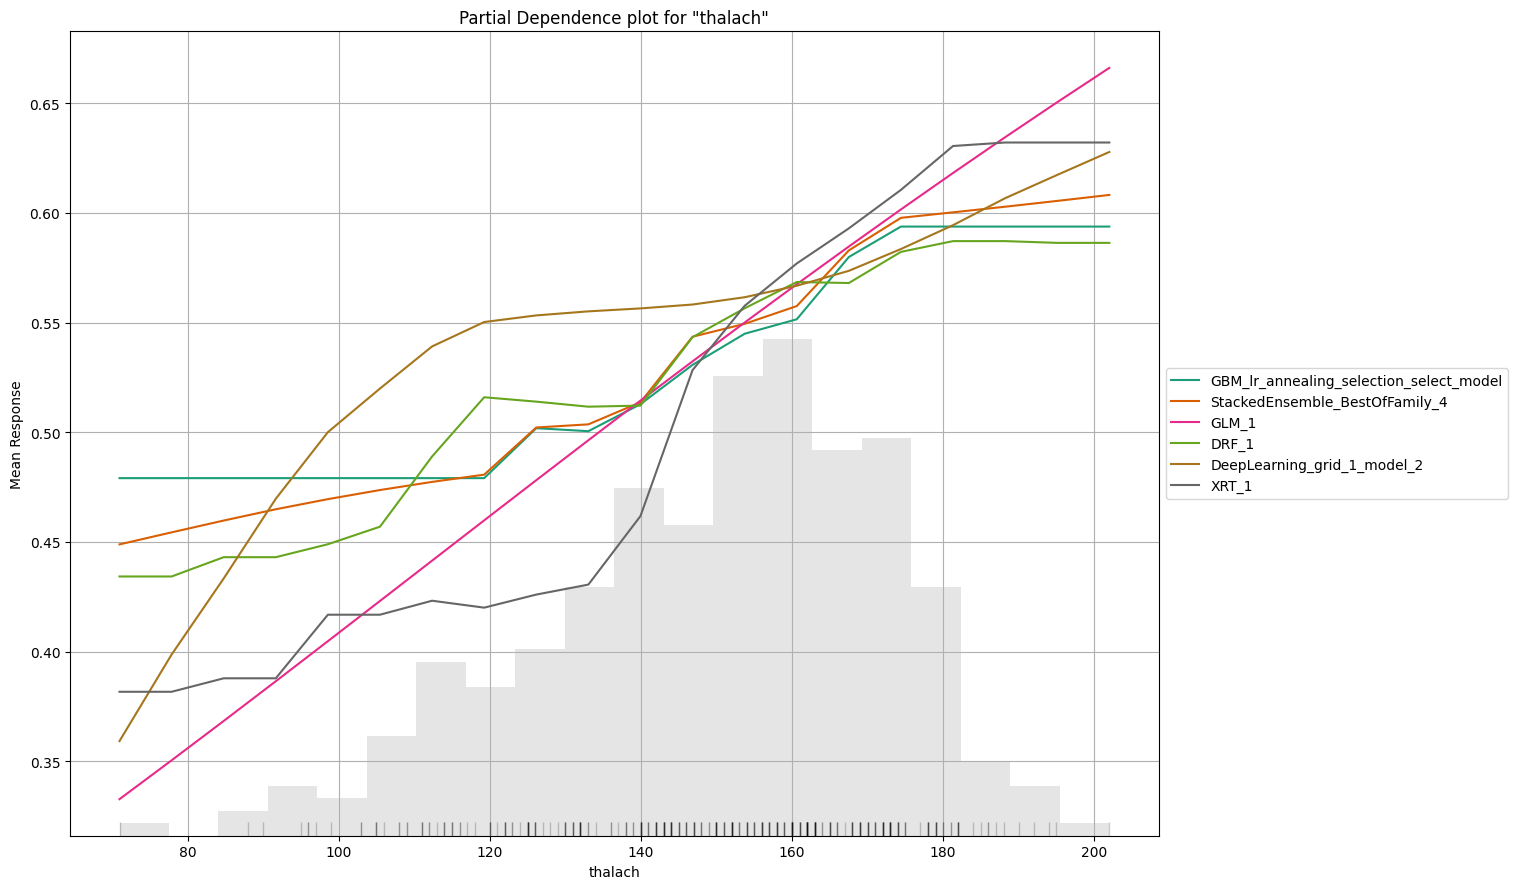

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20240423_222413_model_8,1,0.0435673,1,0,0.0463362,0.00214704,74,0.011662,GBM
GBM_grid_1_AutoML_1_20240423_222413_model_13,1,0.0724566,1,0,0.0975874,0.00952329,95,0.012854,GBM
GBM_grid_1_AutoML_1_20240423_222413_model_21,1,0.0362528,1,0,0.0423659,0.00179487,85,0.011793,GBM
GBM_grid_1_AutoML_1_20240423_222413_model_18,1,0.0611748,1,0,0.0784191,0.00614955,82,0.01317,GBM
GBM_5_AutoML_1_20240423_222413,1,0.0710821,1,0,0.0857029,0.00734498,50,0.008752,GBM
DRF_1_AutoML_1_20240423_222413,1,0.114775,1,0,0.142543,0.0203186,109,0.008781,DRF
GBM_grid_1_AutoML_1_20240423_222413_model_15,1,0.103562,1,0,0.122633,0.0150389,66,0.010304,GBM
DeepLearning_grid_1_AutoML_1_20240423_222413_model_1,0.999956,0.0313402,0.999963,0.00362319,0.0914337,0.00836012,3156,0.009855,DeepLearning
DeepLearning_grid_1_AutoML_1_20240423_222413_model_2,0.999956,0.0367916,0.999963,0.00362319,0.102406,0.010487,1609,0.009384,DeepLearning
GBM_grid_1_AutoML_1_20240423_222413_model_12,0.99978,0.127519,0.999816,0.00724638,0.144815,0.0209713,36,0.0082,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_lr_annealing_selection_AutoML_1_20240423_222413_select_model

,0,1,Error,Rate
0,116.0,22.0,0.1594,(22.0/138.0)
1,9.0,156.0,0.0545,(9.0/165.0)
Total,125.0,178.0,0.1023,(31.0/303.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

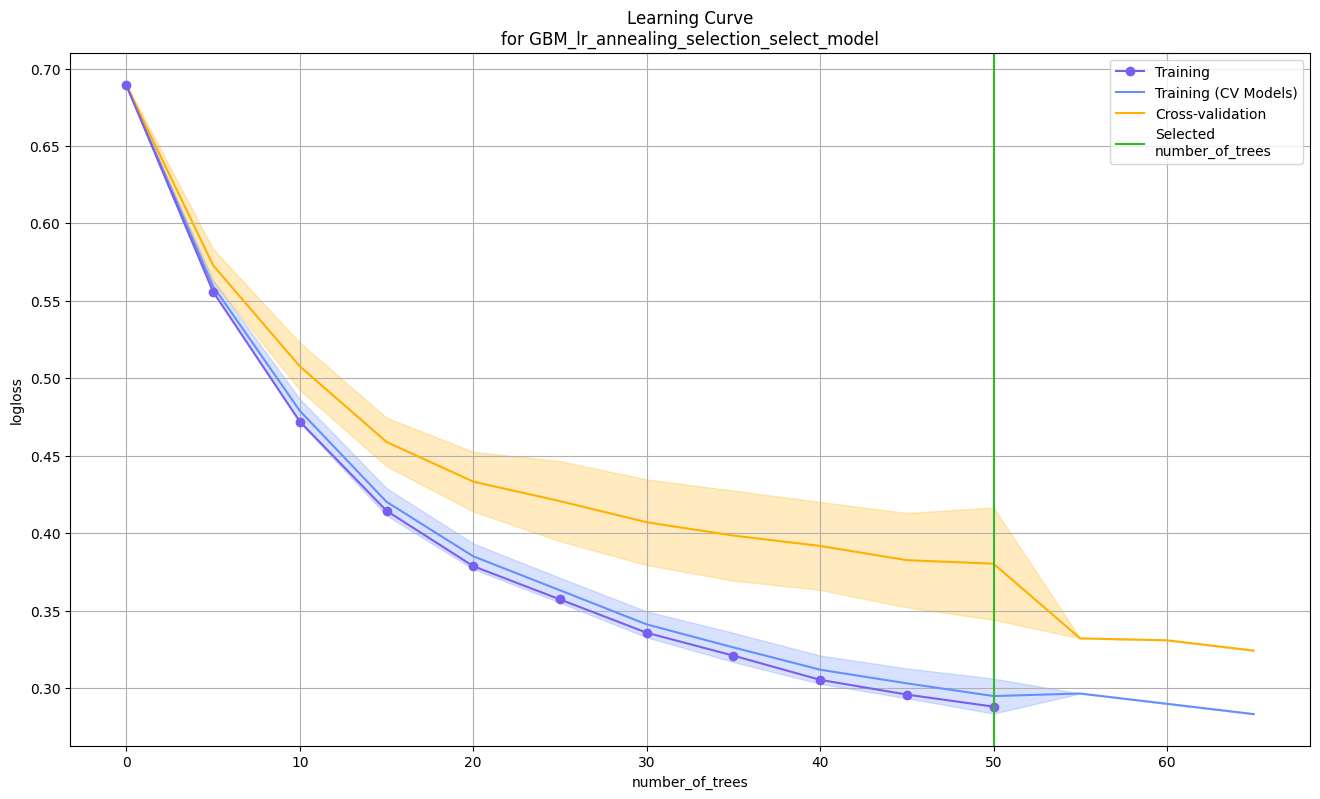

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

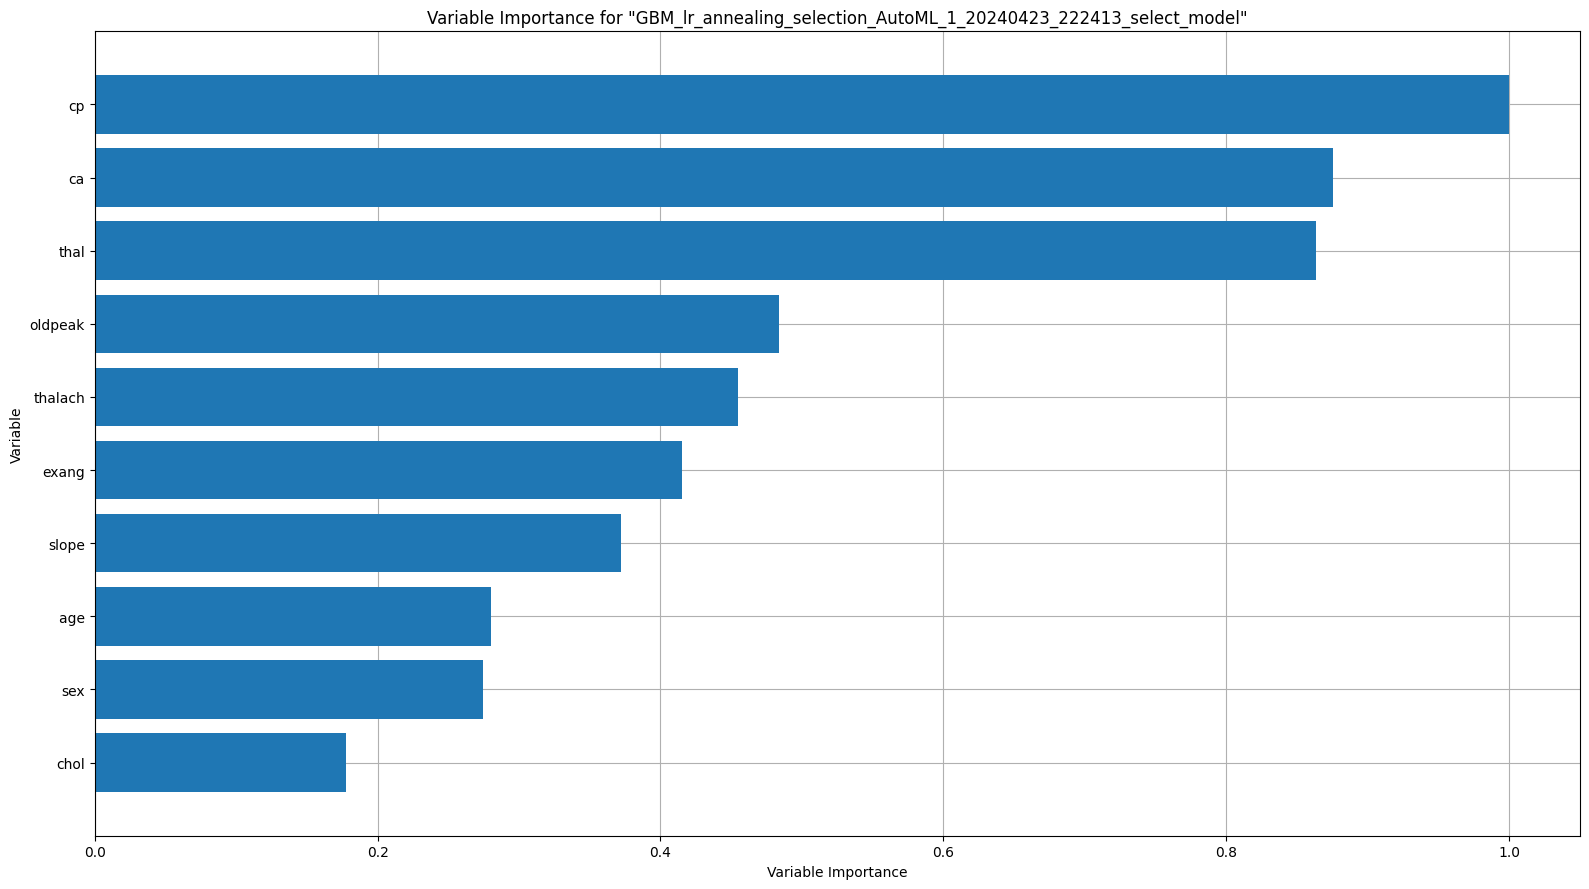

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

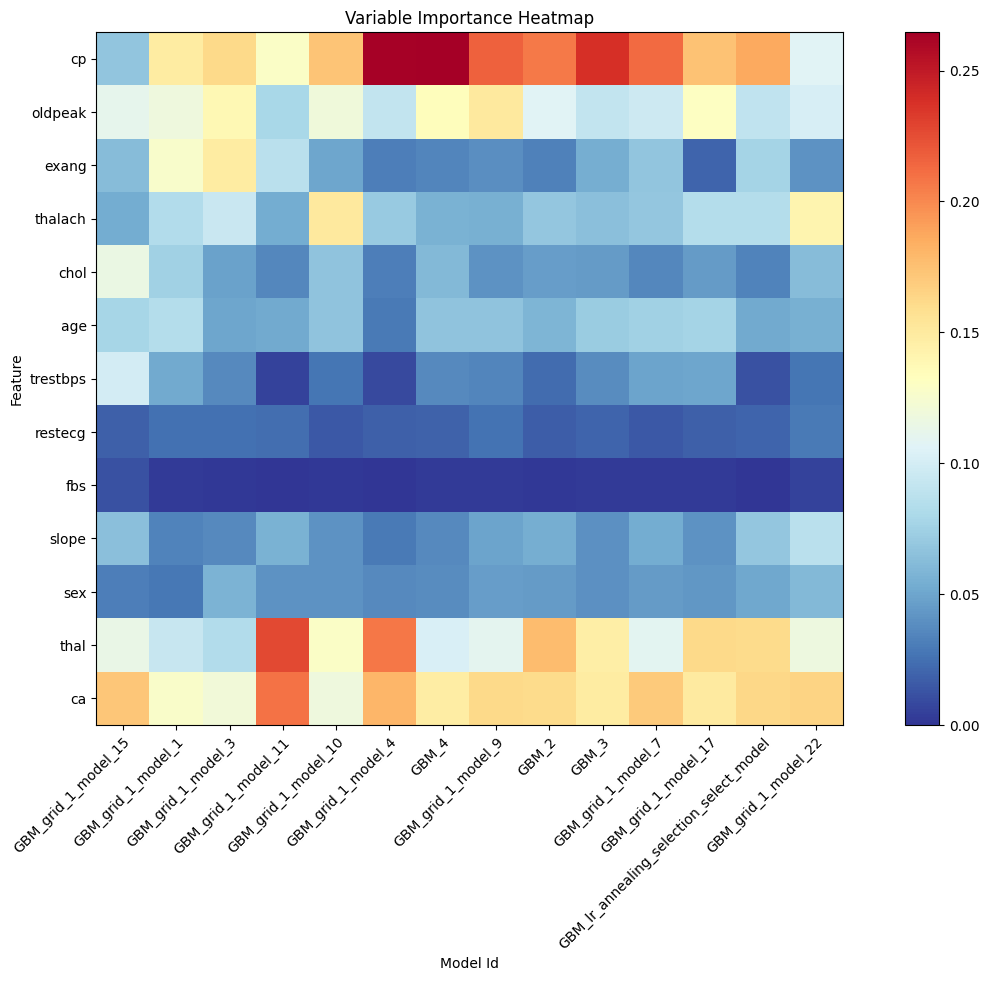

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

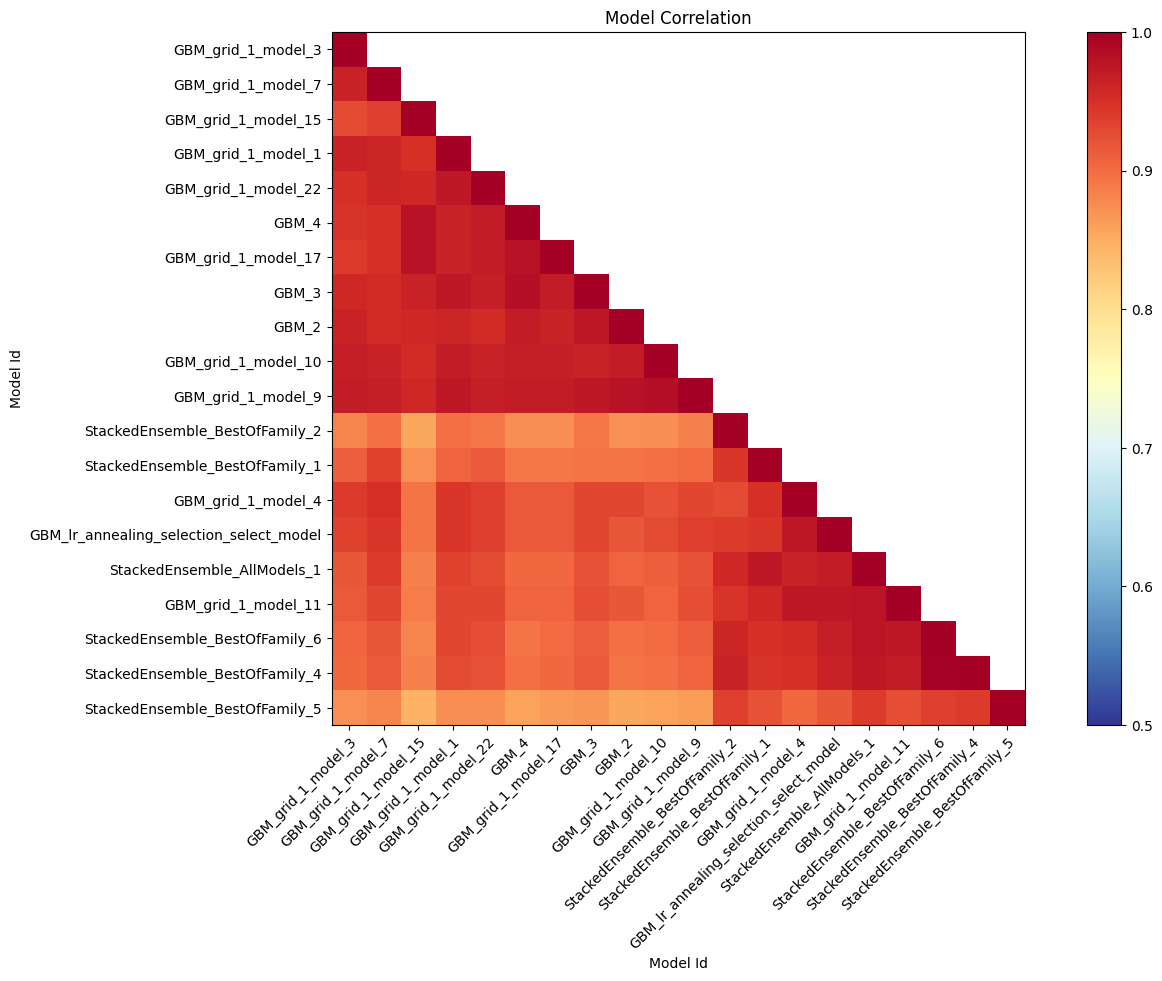

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

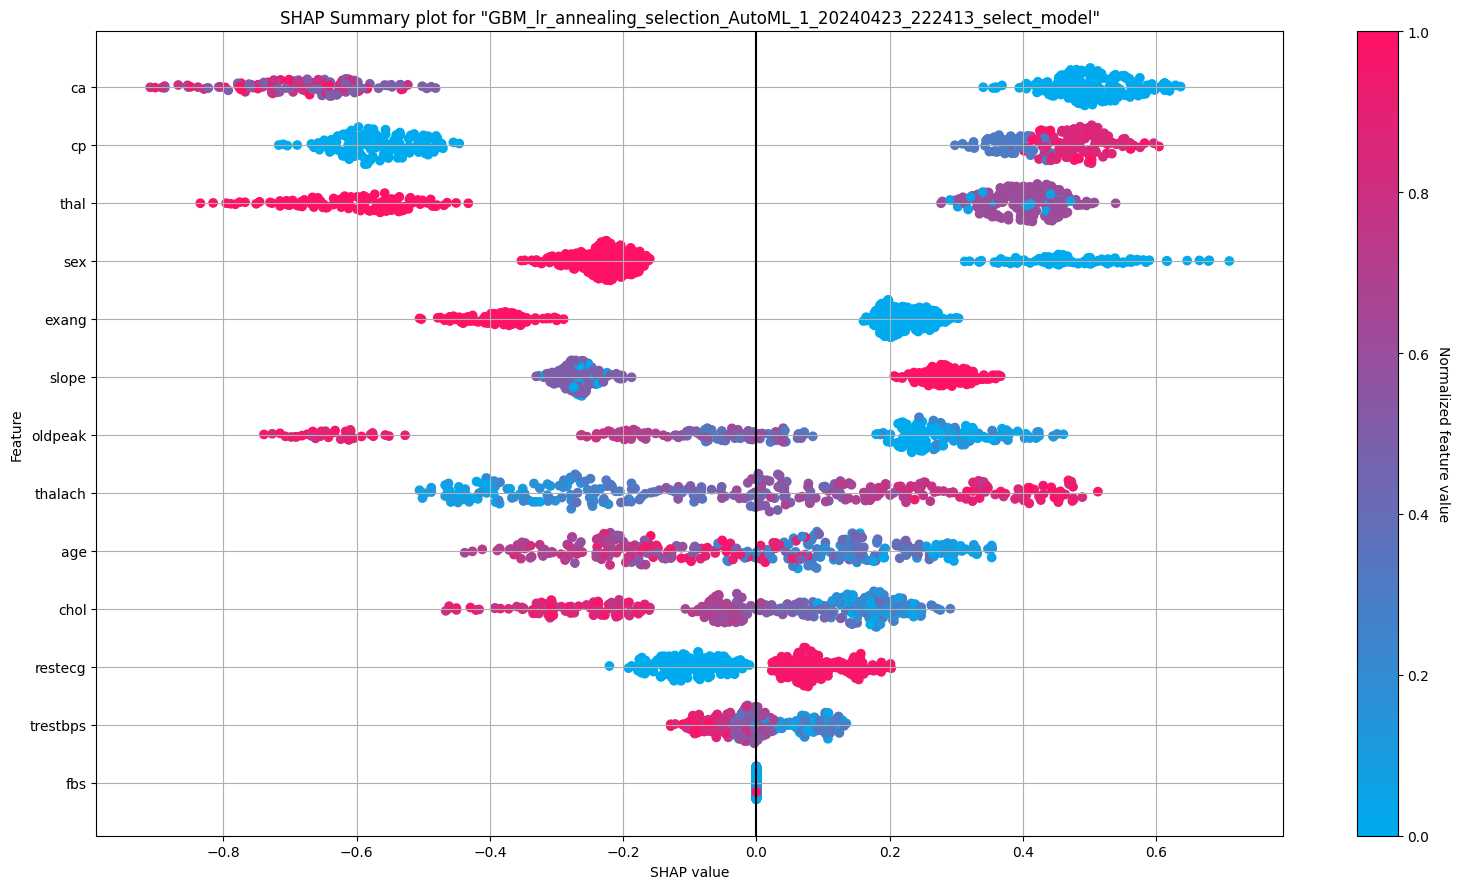

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

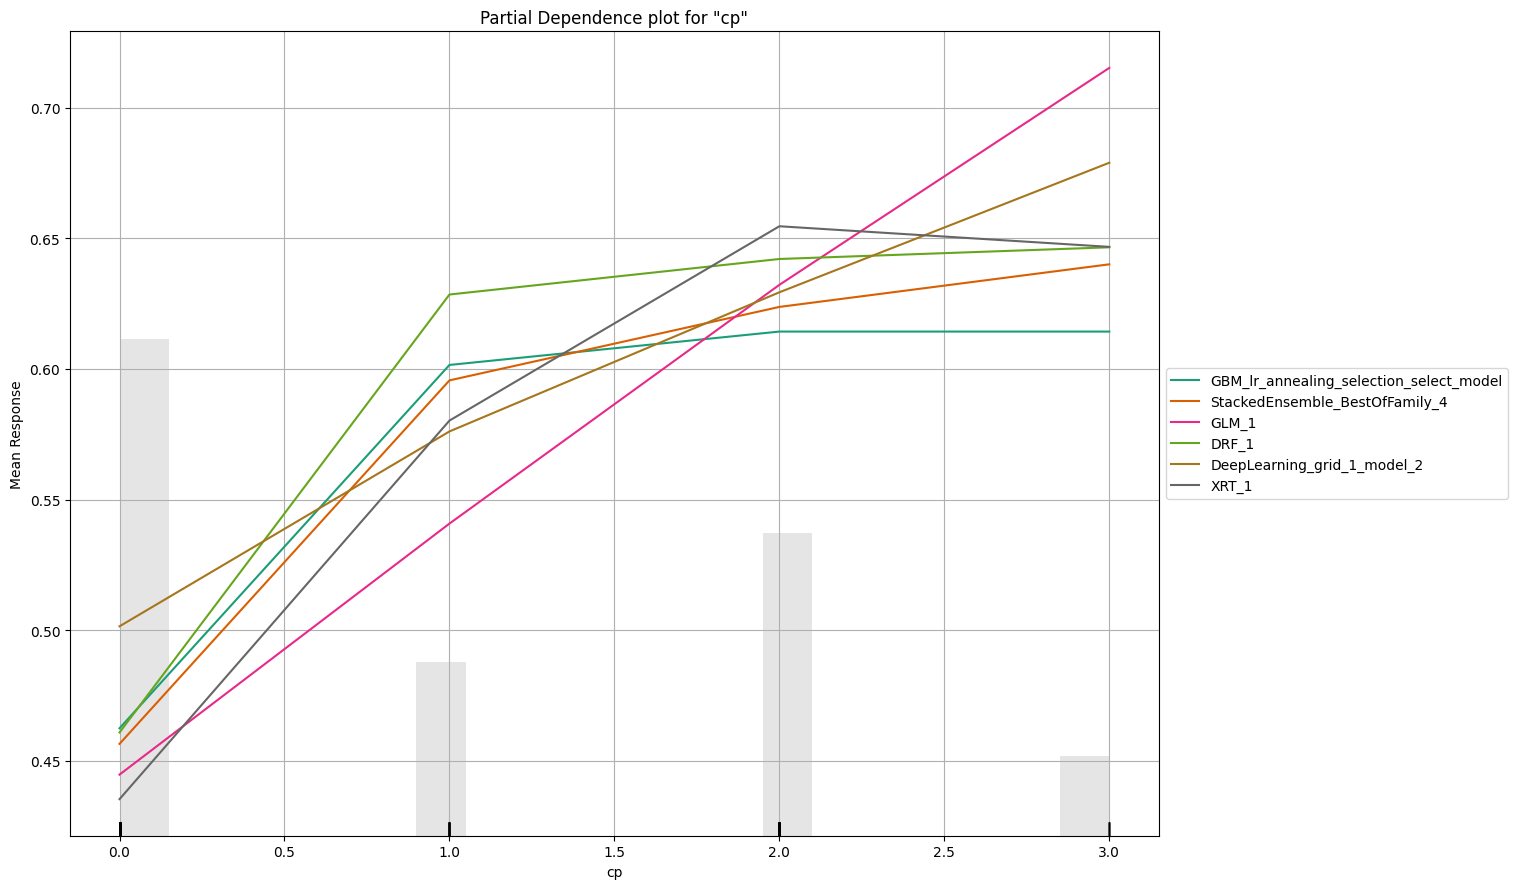

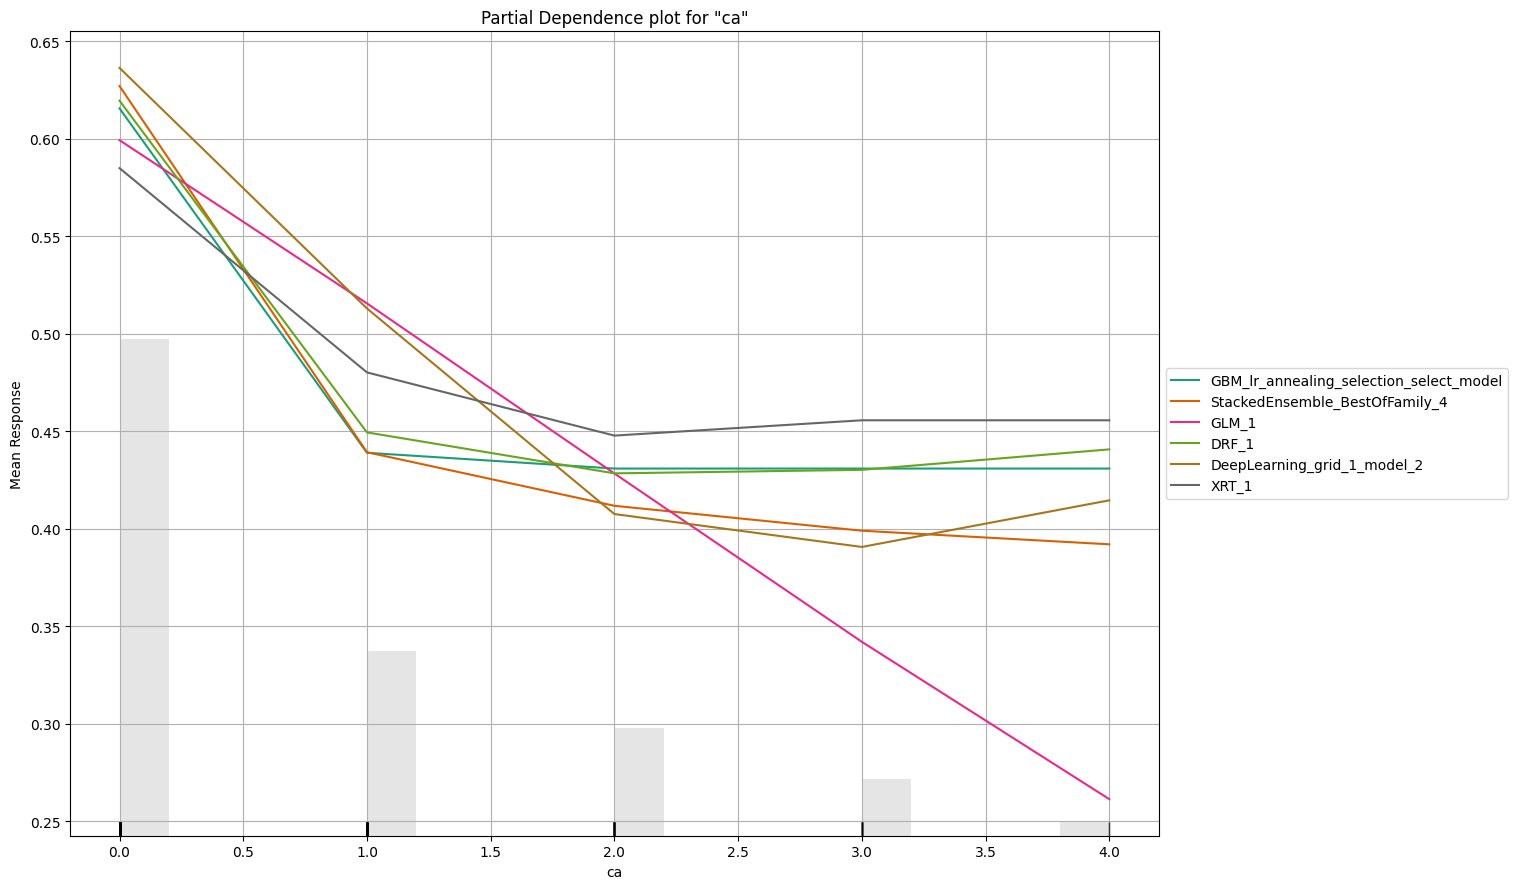

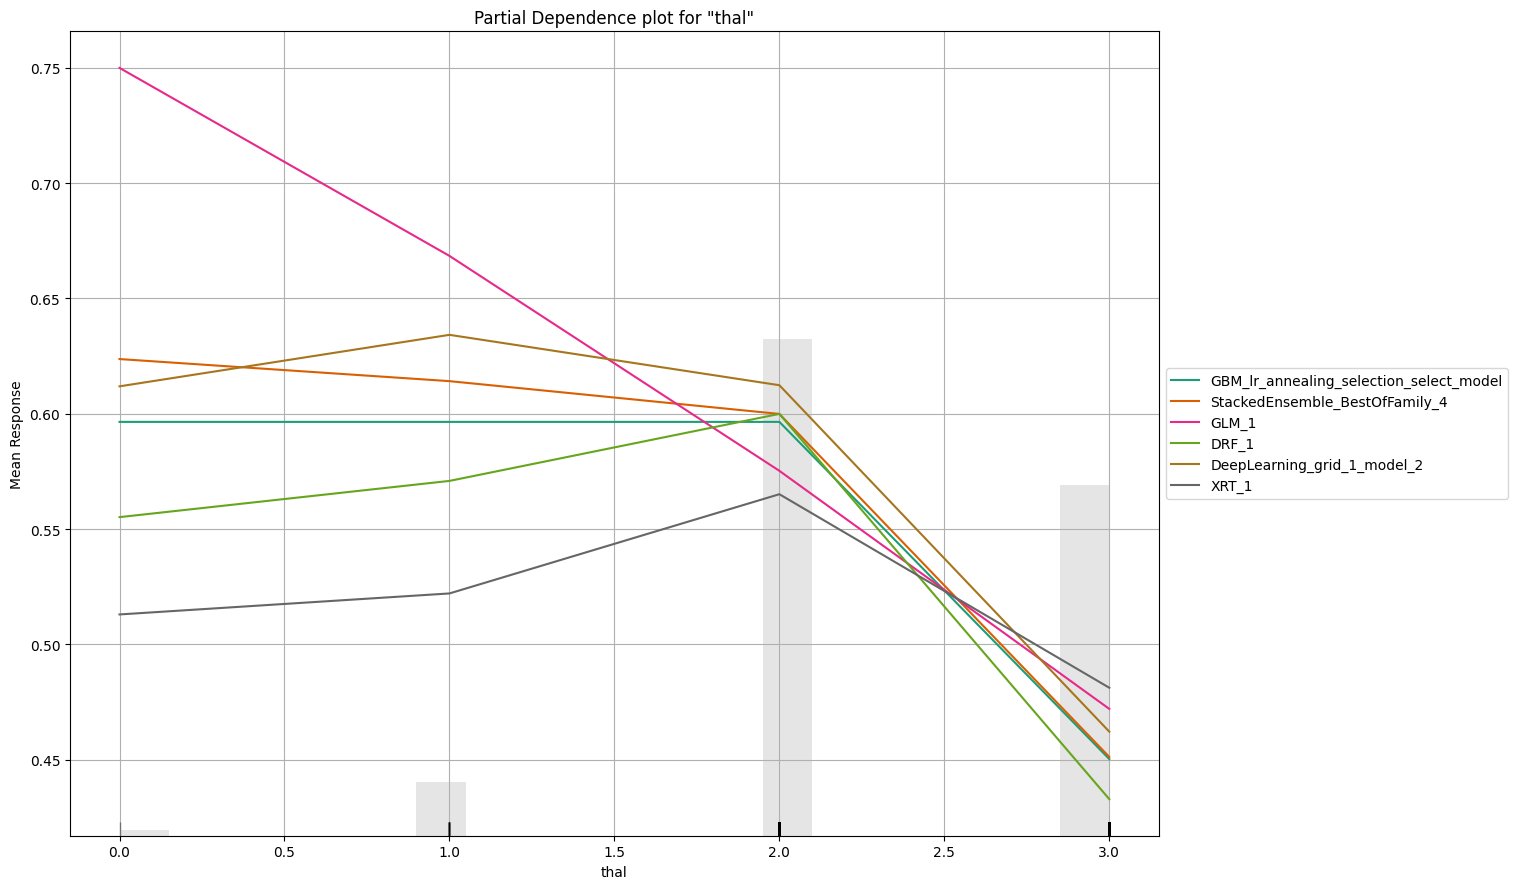

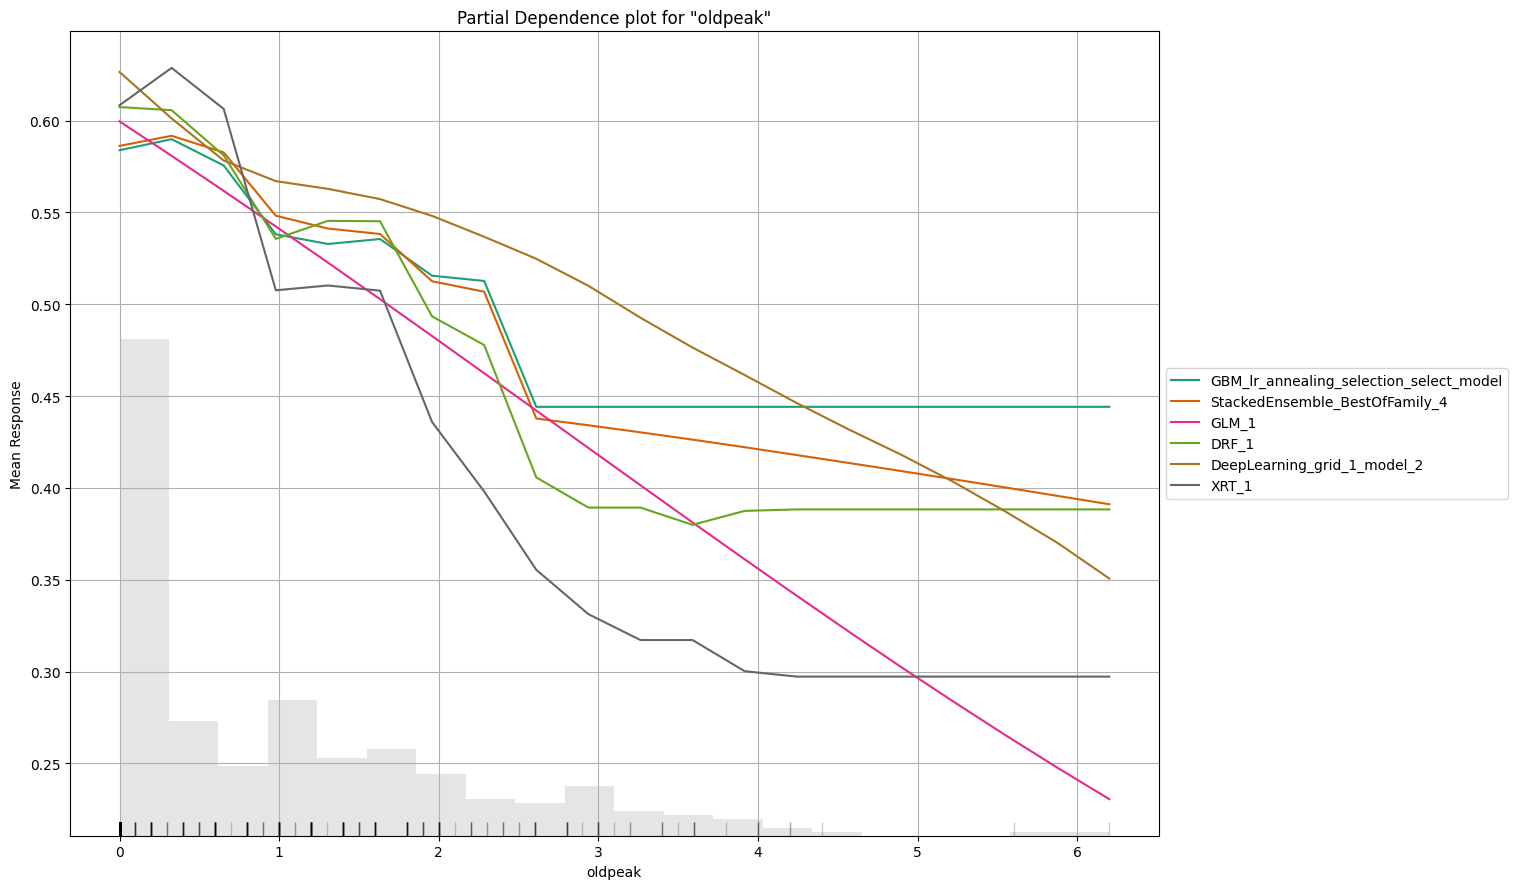

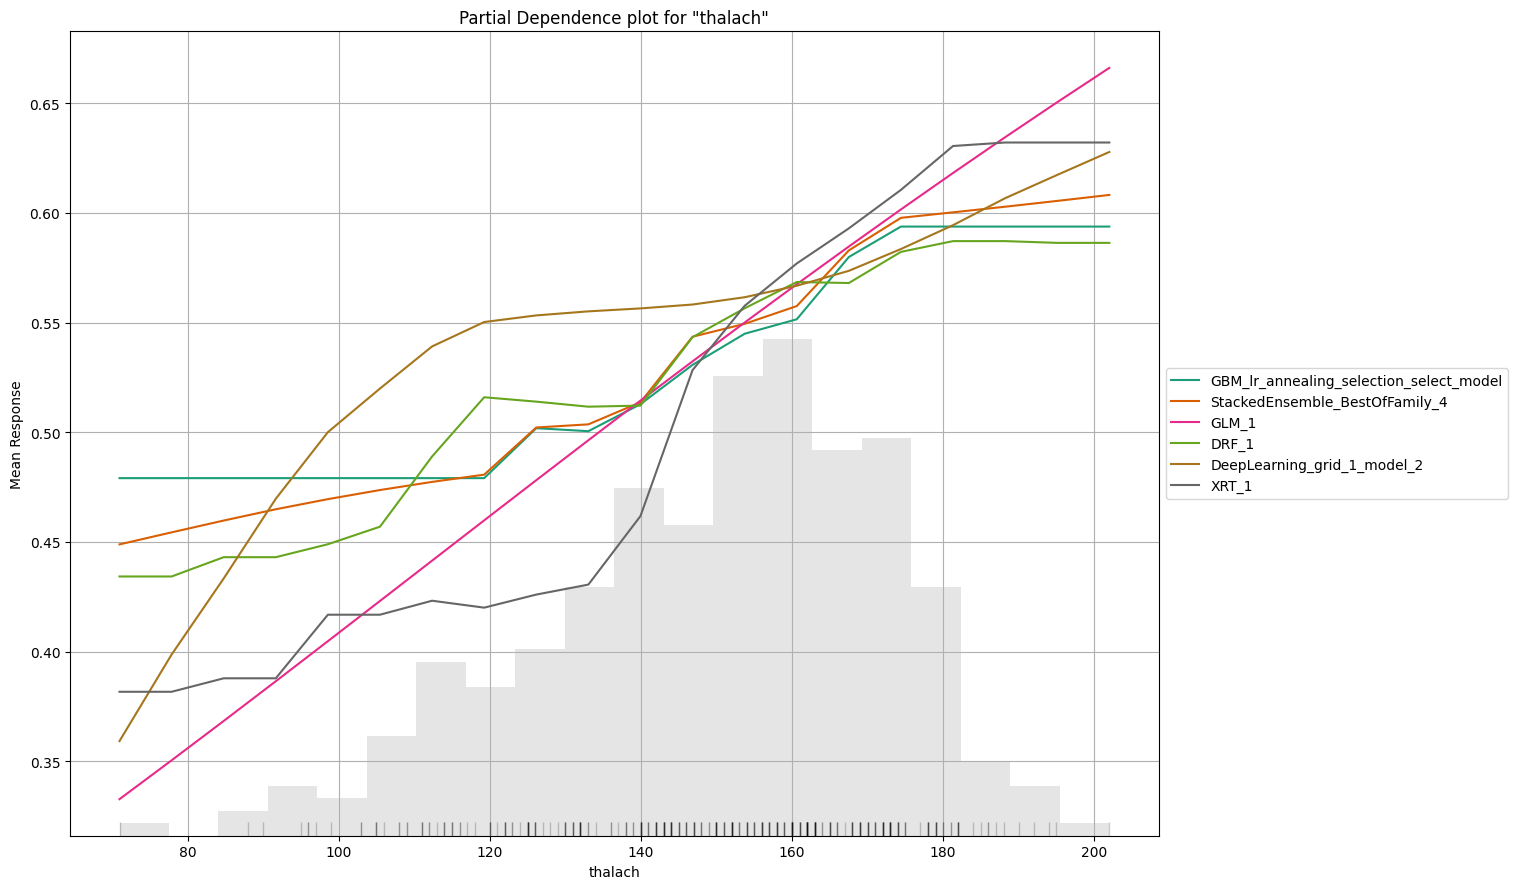

In [7]:
aml.explain(data)